In [6]:
import matplotlib.pyplot as plt
import numpy as np

from ipynb.fs.full.SeedMaskExtractor import find_seed_width_height_area, get_seed_masked_image
from ipynb.fs.full.SeedFinder import find_paths_of_seeds

In [7]:
def find_max_width_height_area_of_seeds(seeds_folder):
    max_width, max_height, max_area = 0, 0, 0
    for path in find_paths_of_seeds(seeds_folder):
        seed = np.load(path)[:,:,200]
        width, height, _, _, area = find_seed_width_height_area(seed)
        max_width = width if width > max_width else max_width
        max_height = height if height > max_height else max_height
        max_area = area if area > max_area else max_area
    return max_width, max_height, max_area

In [8]:
def save_max_width_height(seeds_path, save_path):
    max_width, max_height, _ = find_max_width_height_area_of_seeds(seeds_path)
    np.save(f'{save_path}\max_width.npy', max_width)
    np.save(f'{save_path}\max_height.npy', max_height)

normalization_parameters_path = r'..\home\ARO.local\collaboration\Normalized_Tomato_Seeds\normalization_parameters'
save_max_width_height(r'..\home\ARO.local\collaboration\Itai-tomer', normalization_parameters_path)

In [9]:
def create_resized_image(image, max_width, max_height, data_type):
    height, width, bands = image.shape
    resized_image = np.zeros((max_height + 2, max_width + 2, bands), dtype=data_type)  # +2 is for all the seeds to be surrounded by black
    row_offset, column_offset = (max_height - height)//2 + 1, (max_width - width)//2 + 1
    resized_image[row_offset:row_offset + height, column_offset:column_offset + width, :] = image
    return resized_image

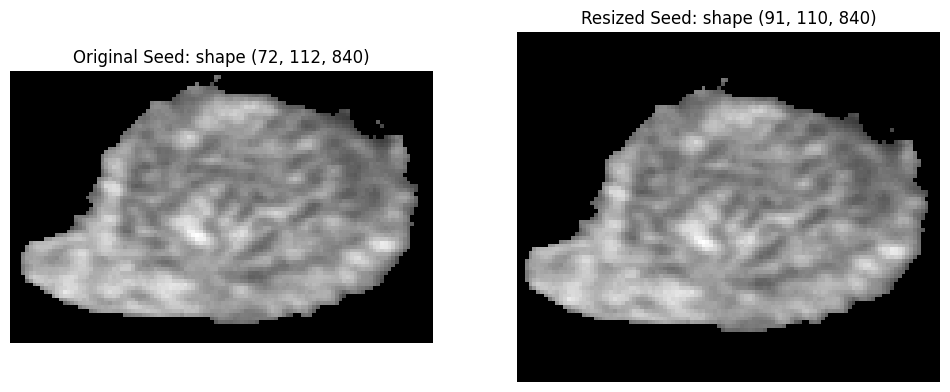

In [10]:
max_width = np.load(f'{normalization_parameters_path}\max_width.npy')
max_height = np.load(f'{normalization_parameters_path}\max_height.npy')
seed = np.load(r'..\home\ARO.local\collaboration\Itai-tomer\tomer_data\Healthy\S3_LP3\Vnir\T1\T1L\seeds\1D.npy')
masked_image = get_seed_masked_image(seed, 200)
resized_image = create_resized_image(masked_image, max_width, max_height, seed.dtype)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(seed[:,:,200], cmap='gray')
ax[0].set_title(f'Original Seed: shape {seed.shape}')
ax[0].axis('off')
ax[1].imshow(resized_image[:,:,200], cmap='gray')
ax[1].set_title(f'Resized Seed: shape {resized_image.shape}')
ax[1].axis('off')
plt.show()